# Analys av Iris datasetet med Scikit-Learn
## k-Nearest Neighbor, k-NN
### Mål:
- Repetera Machine Learning: Scikit-Learn, plottning med Seaborn, Pandas etc
- Kolla om vi kan ***klassificera*** species i iris datasetet med hjälp av k-NN.
- Det här är ett ***"Multi-Class Classification"*** problem, eftersom det finns tre olika species av Iris.
<br>
### Steg för steg:
- Läser in datasetet från Seaborn. OBS, samma dataset kan även importeras från SciKit-Learn, men då är X, y redan separerade (X=iris.data, y=iris.target)
- Definierar X (oberoende variabler, features) och y (beroende variabel, target). Byter ut namnet på iris till 0, 1 eller 2 manuellt.  
`iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})`
- Definierar ett model-object:  
`model = KNeighborsClassifier(n_neighbors=3)`
- ***'n_neighbors'*** anger hur många neighbors som modellen använder.
- Tränar modellen med .fit  
`model.fit(X_train, y_train)`
- Använder den tränade modellen för att prediktera y_pred:  
`y_pred = model.predict(X_test)`
- Evaluerar modellen:  
`print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")`  
`print("Classification Report:")`  
`print(classification_report(y_test, y_pred))`  
- Visualiserar en Confusion Matrix med Seaborn
- Gör en enkel Hyperparameter Tuning för olika ***k*** Nearest Neighbor.
## Noteringar / Lessons Learned
- Använd KNeighborsClassifier för klassificerings-problem.
## Länkar:
[Medium - Hyperparameter Tuning of KNN](https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7)

In [10]:
import seaborn as sn
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # denna ska användas för att skapa en KNN klassificerare
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
import numpy as np

In [2]:
iris = load_dataset('iris') # load iris dataset as a pandas dataframe

In [4]:
pd.set_option('future.no_silent_downcasting', True) # to avoid warning on deprecated 'replace' method
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Define X and y
X = iris.drop(columns=['species'])
y = iris[['species']]

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# convert y_train to 1D (numpy) array to avoid warning
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values.ravel()
    y_train = y_train.astype(int) # make sure y_train is of type int

# convert y_test to 1D (numpy) array to avoid warning
if not isinstance(y_test, np.ndarray):
	y_test = y_test.values.ravel()
	y_test = y_test.astype(int) # make sure y_test is of type int

Träna en nearest neighbor modell:

In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Prediktera mha av modellen:

In [12]:
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

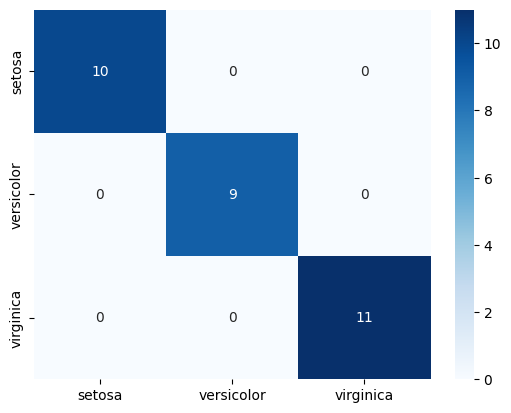

In [13]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])

Ett enkelt sätt att göra Hyperparameter Tuning:

In [14]:
neighbors = [3, 5, 7, 9, 11]
for n in neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_neighbors: {n}, Accuracy: {accuracy:.2f}")

n_neighbors: 3, Accuracy: 1.00
n_neighbors: 5, Accuracy: 1.00
n_neighbors: 7, Accuracy: 0.97
n_neighbors: 9, Accuracy: 1.00
n_neighbors: 11, Accuracy: 1.00
